In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 [==============================] - 0s 39ms/step


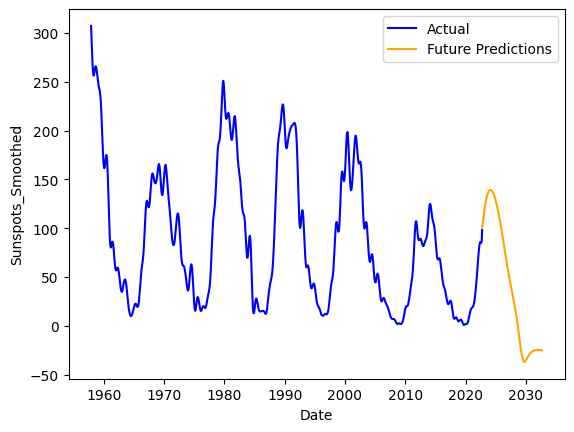

In [1]:
# SCRIPT THAT ONLY PLOTS THE PREDICTION !!!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from google.colab import files
from tensorflow.keras.models import load_model

# Load the dataset
raw_data = pd.read_excel('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/All_Data_Stitched.xlsx')

# Data preprocessing
columns_to_keep = ['Year', 'Month', 'Sunspots_Smoothed']
new_data = raw_data.loc[:, columns_to_keep]
new_data['Date'] = pd.to_datetime(new_data[['Year', 'Month']].assign(day=1))
new_data.drop(['Year', 'Month'], axis=1, inplace=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(new_data[['Sunspots_Smoothed']])

# Define the window size
window_size = 120

# Use the last 'window_size' data points from the original dataset as input for prediction
last_input_sequence = scaled_data[-window_size:]
last_input_sequence = last_input_sequence.reshape(1, window_size, 1)  # Reshape for the model input

future_predictions = []  # List to store the future predictions

# load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/After_Train_Analysis/Models_Created/Solar_Sunspots_Only/model_2nd_good_solar.h5')

for _ in range(120):
    prediction = model.predict(last_input_sequence)
    future_predictions.append(prediction[0, 0])  # Append the predicted value to the list

    # Update the input sequence for the next prediction
    last_input_sequence[0, :-1, :] = last_input_sequence[0, 1:, :]  # Shift data one step to the left
    last_input_sequence[0, -1, 0] = prediction[0, 0]  # Update the last element with the predicted value

# Inverse transform the scaled predictions to get the actual values
future_predictions = np.array(future_predictions).reshape(-1, 1)  # Convert to 2D array
future_predictions = scaler.inverse_transform(future_predictions).flatten()

# Get the last date in the original dataset
last_date = new_data['Date'].iloc[-1]

# Generate future dates for the next 120 months
future_dates = pd.date_range(start=last_date, periods=120, freq='MS')

# Plot actual data
plt.plot(new_data['Date'], new_data['Sunspots_Smoothed'], label='Actual', color='blue')

# Plot future predictions
plt.plot(future_dates, future_predictions, label='Future Predictions', color='orange')

plt.xlabel('Date')
plt.ylabel('Sunspots_Smoothed')
plt.legend()
plt.show()


In [2]:
model_2_predictions = future_predictions # the simple LSTM model with simple structure and window of 120

1/1 [==============================] - 0s 50ms/step


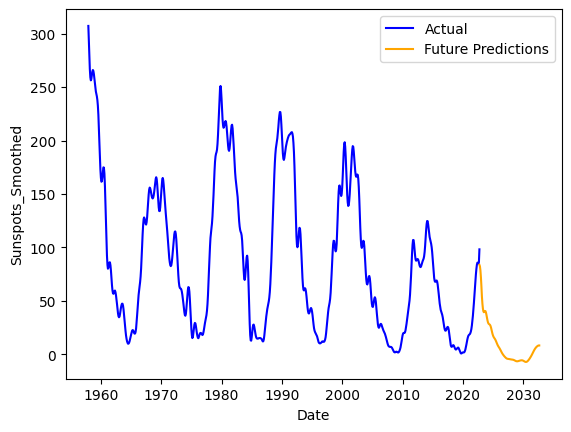

In [3]:
# SCRIPT THAT ONLY PLOTS THE PREDICTION !!!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from google.colab import files
from tensorflow.keras.models import load_model

# Load the dataset
raw_data = pd.read_excel('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/All_Data_Stitched.xlsx')

# Data preprocessing
columns_to_keep = ['Year', 'Month', 'Sunspots_Smoothed']
new_data = raw_data.loc[:, columns_to_keep]
new_data['Date'] = pd.to_datetime(new_data[['Year', 'Month']].assign(day=1))
new_data.drop(['Year', 'Month'], axis=1, inplace=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(new_data[['Sunspots_Smoothed']])

# Define the window size
window_size = 120

# Use the last 'window_size' data points from the original dataset as input for prediction
last_input_sequence = scaled_data[-window_size:]
last_input_sequence = last_input_sequence.reshape(1, window_size, 1)  # Reshape for the model input

future_predictions = []  # List to store the future predictions

# load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/After_Train_Analysis/Models_Created/Solar_Sunspots_Only/model_3rd_COMPLICATED_good_solar.h5')

for _ in range(120):
    prediction = model.predict(last_input_sequence)
    future_predictions.append(prediction[0, 0])  # Append the predicted value to the list

    # Update the input sequence for the next prediction
    last_input_sequence[0, :-1, :] = last_input_sequence[0, 1:, :]  # Shift data one step to the left
    last_input_sequence[0, -1, 0] = prediction[0, 0]  # Update the last element with the predicted value

# Inverse transform the scaled predictions to get the actual values
future_predictions = np.array(future_predictions).reshape(-1, 1)  # Convert to 2D array
future_predictions = scaler.inverse_transform(future_predictions).flatten()

# Get the last date in the original dataset
last_date = new_data['Date'].iloc[-1]

# Generate future dates for the next 120 months
future_dates = pd.date_range(start=last_date, periods=120, freq='MS')

# Plot actual data
plt.plot(new_data['Date'], new_data['Sunspots_Smoothed'], label='Actual', color='blue')

# Plot future predictions
plt.plot(future_dates, future_predictions, label='Future Predictions', color='orange')

plt.xlabel('Date')
plt.ylabel('Sunspots_Smoothed')
plt.legend()
plt.show()

In [4]:
model_3_predictions = future_predictions # a 3 LSTM bidirectional RNN with window of 120

1/1 [==============================] - 0s 59ms/step


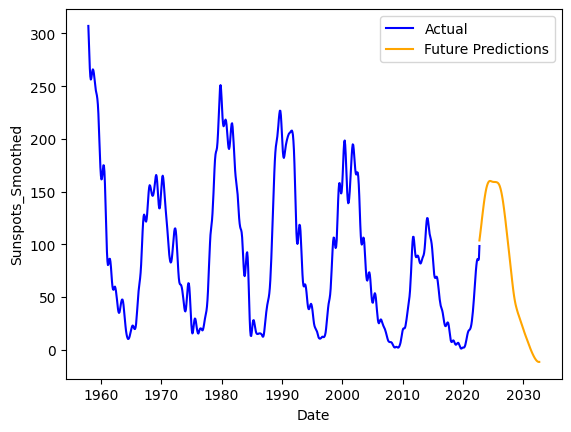

In [5]:
# SCRIPT THAT ONLY PLOTS THE PREDICTION !!!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from google.colab import files
from tensorflow.keras.models import load_model

# Load the dataset
raw_data = pd.read_excel('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/All_Data_Stitched.xlsx')

# Data preprocessing
columns_to_keep = ['Year', 'Month', 'Sunspots_Smoothed']
new_data = raw_data.loc[:, columns_to_keep]
new_data['Date'] = pd.to_datetime(new_data[['Year', 'Month']].assign(day=1))
new_data.drop(['Year', 'Month'], axis=1, inplace=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(new_data[['Sunspots_Smoothed']])

# Define the window size
window_size = 160

# Use the last 'window_size' data points from the original dataset as input for prediction
last_input_sequence = scaled_data[-window_size:]
last_input_sequence = last_input_sequence.reshape(1, window_size, 1)  # Reshape for the model input

future_predictions = []  # List to store the future predictions

# load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/After_Train_Analysis/Models_Created/Solar_Sunspots_Only/model_4rth_COMPLICATED_good_solar.h5')

for _ in range(120):
    prediction = model.predict(last_input_sequence)
    future_predictions.append(prediction[0, 0])  # Append the predicted value to the list

    # Update the input sequence for the next prediction
    last_input_sequence[0, :-1, :] = last_input_sequence[0, 1:, :]  # Shift data one step to the left
    last_input_sequence[0, -1, 0] = prediction[0, 0]  # Update the last element with the predicted value

# Inverse transform the scaled predictions to get the actual values
future_predictions = np.array(future_predictions).reshape(-1, 1)  # Convert to 2D array
future_predictions = scaler.inverse_transform(future_predictions).flatten()

# Get the last date in the original dataset
last_date = new_data['Date'].iloc[-1]

# Generate future dates for the next 120 months
future_dates = pd.date_range(start=last_date, periods=120, freq='MS')

# Plot actual data
plt.plot(new_data['Date'], new_data['Sunspots_Smoothed'], label='Actual', color='blue')

# Plot future predictions
plt.plot(future_dates, future_predictions, label='Future Predictions', color='orange')

plt.xlabel('Date')
plt.ylabel('Sunspots_Smoothed')
plt.legend()
plt.show()

In [6]:
model_4_predictions = future_predictions # a 3 LSTM bidirectional RNN with window of 160

1/1 [==============================] - 0s 72ms/step


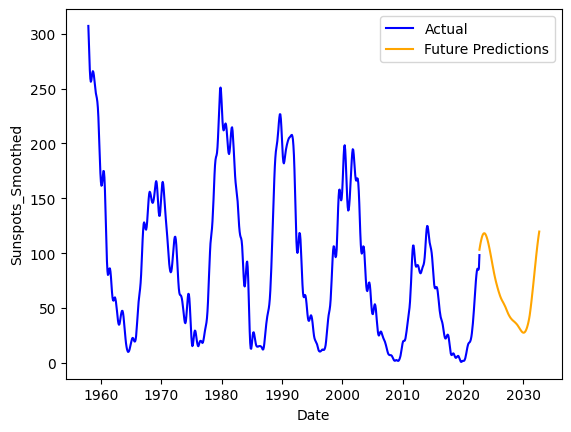

In [7]:
# SCRIPT THAT ONLY PLOTS THE PREDICTION !!!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from google.colab import files
from tensorflow.keras.models import load_model

# Load the dataset
raw_data = pd.read_excel('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/All_Data_Stitched.xlsx')

# Data preprocessing
columns_to_keep = ['Year', 'Month', 'Sunspots_Smoothed']
new_data = raw_data.loc[:, columns_to_keep]
new_data['Date'] = pd.to_datetime(new_data[['Year', 'Month']].assign(day=1))
new_data.drop(['Year', 'Month'], axis=1, inplace=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(new_data[['Sunspots_Smoothed']])

# Define the window size
window_size = 200

# Use the last 'window_size' data points from the original dataset as input for prediction
last_input_sequence = scaled_data[-window_size:]
last_input_sequence = last_input_sequence.reshape(1, window_size, 1)  # Reshape for the model input

future_predictions = []  # List to store the future predictions

# load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/After_Train_Analysis/Models_Created/Solar_Sunspots_Only/model_5th_COMPLICATED_good_solar.h5')

for _ in range(120):
    prediction = model.predict(last_input_sequence)
    future_predictions.append(prediction[0, 0])  # Append the predicted value to the list

    # Update the input sequence for the next prediction
    last_input_sequence[0, :-1, :] = last_input_sequence[0, 1:, :]  # Shift data one step to the left
    last_input_sequence[0, -1, 0] = prediction[0, 0]  # Update the last element with the predicted value

# Inverse transform the scaled predictions to get the actual values
future_predictions = np.array(future_predictions).reshape(-1, 1)  # Convert to 2D array
future_predictions = scaler.inverse_transform(future_predictions).flatten()

# Get the last date in the original dataset
last_date = new_data['Date'].iloc[-1]

# Generate future dates for the next 120 months
future_dates = pd.date_range(start=last_date, periods=120, freq='MS')

# Plot actual data
plt.plot(new_data['Date'], new_data['Sunspots_Smoothed'], label='Actual', color='blue')

# Plot future predictions
plt.plot(future_dates, future_predictions, label='Future Predictions', color='orange')

plt.xlabel('Date')
plt.ylabel('Sunspots_Smoothed')
plt.legend()
plt.show()

In [8]:
model_5_predictions = future_predictions # a 3 LSTM bidirectional RNN with window of 200

In [9]:
new_data.loc[615:777, ['Date']]

,Date
615,2009-03-01
616,2009-04-01
617,2009-05-01
618,2009-06-01
619,2009-07-01
...,...
773,2022-05-01
774,2022-06-01
775,2022-07-01
776,2022-08-01


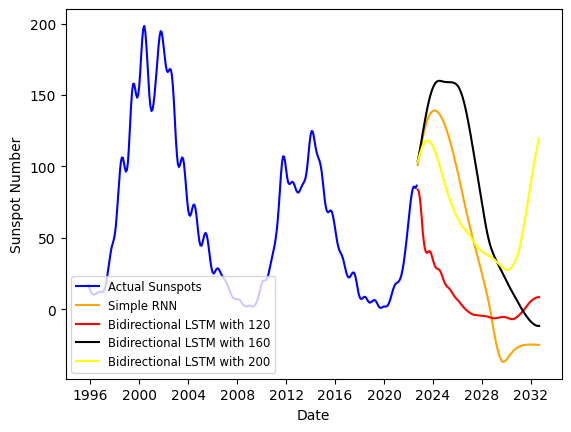

In [10]:
plt.plot(new_data.loc[455:777, ['Date']], new_data.loc[455:777, ['Sunspots_Smoothed']], label='Actual Sunspots', color='blue')
plt.plot(future_dates, model_2_predictions, label='Simple RNN', color='orange')
plt.plot(future_dates, model_3_predictions, label='Bidirectional LSTM with 120', color='red')
plt.plot(future_dates, model_4_predictions, label='Bidirectional LSTM with 160', color='black')
plt.plot(future_dates, model_5_predictions, label='Bidirectional LSTM with 200', color='yellow')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.legend(fontsize='small', loc='lower left')
plt.savefig('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/After_Train_Analysis/Models_Created/Solar_Sunspots_Only/Multi-Method-Plot.png')

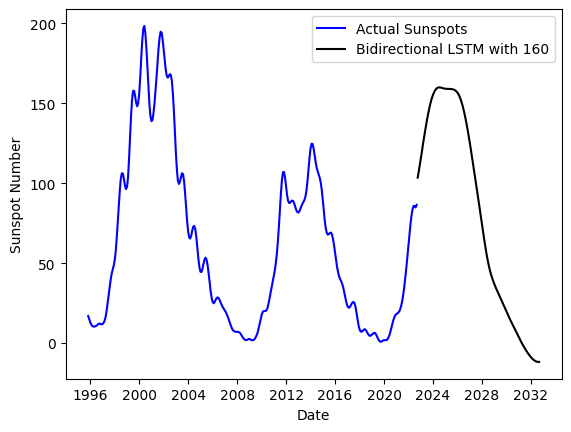

In [11]:
plt.plot(new_data.loc[455:777, ['Date']], new_data.loc[455:777, ['Sunspots_Smoothed']], label='Actual Sunspots', color='blue')
plt.plot(future_dates, model_4_predictions, label='Bidirectional LSTM with 160', color='black')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()

<ipython-input-12-7f475e1cb53c>:9: RuntimeWarning: invalid value encountered in sqrt
  confidence_upper = np.sqrt(model_4_predictions)
<ipython-input-12-7f475e1cb53c>:10: RuntimeWarning: invalid value encountered in sqrt
  confidence_lower = -np.sqrt(model_4_predictions)


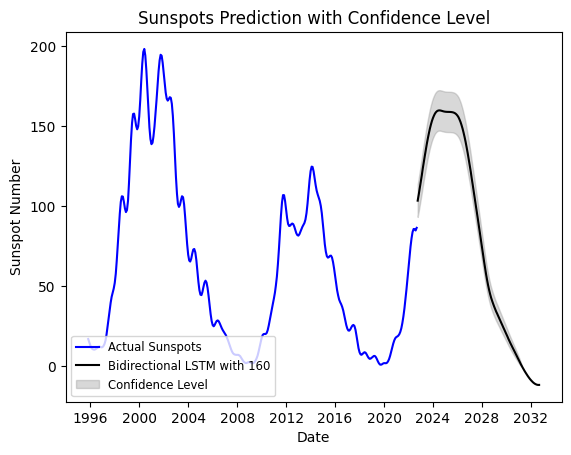

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Your existing code for the first plot
plt.plot(new_data.loc[455:777, ['Date']], new_data.loc[455:777, ['Sunspots_Smoothed']], label='Actual Sunspots', color='blue')
plt.plot(future_dates, model_4_predictions, label='Bidirectional LSTM with 160', color='black')

# Calculate the upper and lower bounds for the confidence level
confidence_upper = np.sqrt(model_4_predictions)
confidence_lower = -np.sqrt(model_4_predictions)

# Plot the confidence level as an error bar using plt.fill_between
plt.fill_between(future_dates, model_4_predictions + confidence_upper, model_4_predictions + confidence_lower, color='gray', alpha=0.3, label='Confidence Level')

# Add labels, legend, and other plot elements
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.legend(fontsize='small', loc='lower left')
plt.title('Sunspots Prediction with Confidence Level')
# Show the plot
plt.savefig('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/After_Train_Analysis/Models_Created/Solar_Sunspots_Only/Final-RNN-Prediction.png')

In [ ]:
new_data['Date']

0     1957-12-01
1     1958-01-01
2     1958-02-01
3     1958-03-01
4     1958-04-01
         ...    
774   2022-06-01
775   2022-07-01
776   2022-08-01
777   2022-09-01
778   2022-10-01
Name: Date, Length: 779, dtype: datetime64[ns]

In [ ]:
print("Month Of Solar maximum " ,future_dates[list(model_2_predictions).index(max(list(model_2_predictions)))])
print("Sunspots at maximum ", max(list(model_2_predictions)))
print('Duration of 25th Cycle', len(list(model_2_predictions))-6+10+12+12 , " months")

Month Of Solar maximum  2024-02-01 00:00:00
Sunspots at maximum  139.14197
Duration of 25th Cycle 148  months


In [ ]:
print("Month Of Solar maximum " ,future_dates[list(model_3_predictions).index(max(list(model_3_predictions)))])
print("Sunspots at maximum ", max(list(model_3_predictions)))
print('Duration of 25th Cycle', len(list(model_3_predictions))-17+10+12+12 , " months")

Month Of Solar maximum  2022-10-01 00:00:00
Sunspots at maximum  83.7429
Duration of 25th Cycle 137  months


In [ ]:
print("Month Of Solar maximum " ,future_dates[list(model_4_predictions).index(max(list(model_4_predictions)))])
print("Sunspots at maximum ", max(list(model_4_predictions)))
print('Duration of 25th Cycle', len(list(model_4_predictions))-6+10+12+12 , " months")

Month Of Solar maximum  2024-07-01 00:00:00
Sunspots at maximum  159.98154
Duration of 25th Cycle 148  months


In [ ]:
print("Month Of Solar maximum " ,future_dates[list(model_5_predictions).index(max(list(model_5_predictions[0:30])))])
print("Sunspots at maximum ", max(list(model_5_predictions)))
print('Duration of 25th Cycle', len(list(model_5_predictions))-30+10+12+12 , " months")

Month Of Solar maximum  2023-08-01 00:00:00
Sunspots at maximum  119.71894
Duration of 25th Cycle 124  months


In [ ]:
confidence_upper

array([10.173768  , 10.357204  , 10.545585  , 10.736536  , 10.926748  ,
       11.113741  , 11.294185  , 11.466842  , 11.634688  , 11.793276  ,
       11.939936  , 12.07298   , 12.191904  , 12.296599  , 12.386377  ,
       12.461284  , 12.522756  , 12.571115  , 12.60658   , 12.630291  ,
       12.643582  , 12.648381  , 12.646892  , 12.641226  , 12.633739  ,
       12.626191  , 12.620029  , 12.615618  , 12.612998  , 12.611673  ,
       12.611029  , 12.610372  , 12.60918   , 12.606893  , 12.602892  ,
       12.596247  , 12.585802  , 12.570134  , 12.547674  , 12.516758  ,
       12.475834  , 12.423498  , 12.358658  , 12.280393  , 12.189715  ,
       12.0858    , 11.968978  , 11.839064  , 11.696866  , 11.542428  ,
       11.378422  , 11.205029  , 11.025047  , 10.838631  , 10.644787  ,
       10.443767  , 10.237705  , 10.027793  ,  9.81189   ,  9.589289  ,
        9.358922  ,  9.12311   ,  8.880068  ,  8.628846  ,  8.373027  ,
        8.115235  ,  7.853945  ,  7.5940757 ,  7.3472824 ,  7.11

In [ ]:
np.sqrt(80)

8.94427190999916